In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df = df.sample(frac = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.4,3.2,4.5,1.5,1.0
39,5.1,3.4,1.5,0.2,0.0
17,5.1,3.5,1.4,0.3,0.0
13,4.3,3.0,1.1,0.1,0.0
55,5.7,2.8,4.5,1.3,1.0


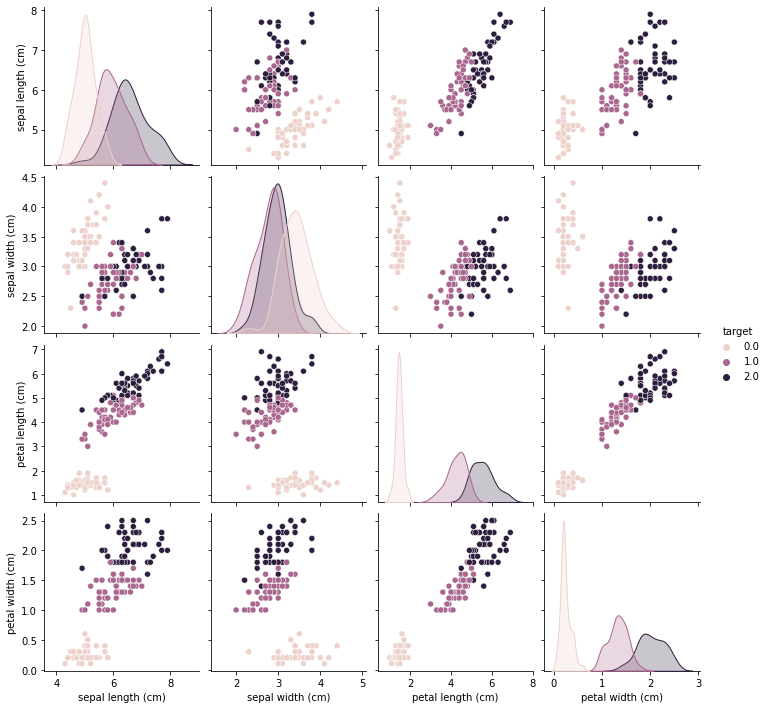

In [8]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [39]:
x = df.iloc[:, 0:4].values
y = df.iloc[0:, 4].values

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_predict = knn.predict(xtest)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(ytest, y_predict))
print(classification_report(ytest, y_predict))
print(confusion_matrix(ytest, y_predict))

0.9333333333333333
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.90      0.90      0.90        10
         2.0       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [45]:
accuracy = []
for i in range(1,50):
    clf =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, ytrain)
    y_predict = knn.predict(x_test)
    accuracy.append(accuracy_score(ytest, y_predict))
# print(accuracy)

Text(0, 0.5, 'Accuracy score')

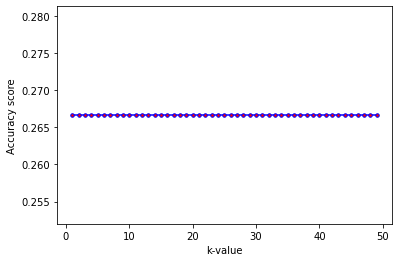

In [46]:
# plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt
plt.plot(range(1,50), accuracy, c='b', marker = '.', markerfacecolor = 'r', markersize=7)
plt.xlabel('k-value')
plt.ylabel('Accuracy score')